<a href="https://colab.research.google.com/github/buone2/ML-CODE/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

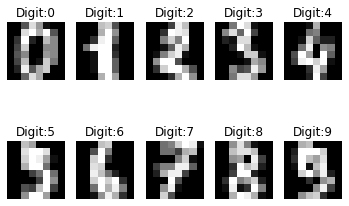

In [1]:
from sklearn import datasets
import matplotlib.pylab as plt 

digits = datasets.load_digits()
print(digits)

print(digits.target)
print(digits.images)


# %%
# 0~9 이미지를 2행 5열로 출력 
# 앞에서 10개를 불러올려면 슬라이싱으로 불러오기 (전체 1797장 중)
for label, img in zip(digits.target[ :10], digits.images[ :10]) : 
    plt.subplot(2, 5, label+1)              # 2행 5열의 이미지 배치 
    plt.axis('off')                         # x축 라벨 없애기
    plt.imshow(img, cmap=plt.cm.gray)       # 이미지 붙이기, 그레이 스케일 이미지 cmap=plt.cm.gray
    plt.title('Digit:{0}'.format(label))    # 제목 

plt.show()

In [5]:
import numpy as np
from sklearn import datasets

# 난수 시드 : 동일한 결과를 출력하기 위해서 설정
np.random.seed(0)

# 손으로 쓴 숫자 데이터 읽기
digits=datasets.load_digits()

# 1과 7의 데이터 위치를 구하기
flag_1_7=(digits.target == 1) + (digits.target == 7)
print(flag_1_7) 


# 1과 7 이미지와 레이블을 구해서 변수에 저장
images = digits.images[flag_1_7]
print(images.shape)
# 357개 , 8행 8열 2차원 

labels = digits.target[flag_1_7]
print(labels.shape)


# 1과 7이 이미지 데이터를 2차원에서 1차원으로 변환
images = images.reshape(images.shape[0], -1)    # -1은 가변적
print(images.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, 
                                                    labels, 
                                                    test_size=0.3, 
                                                    random_state=10)
# x_train     # 훈련 이미지
# x_test      # 테스트 이미지
# y_train     # 훈련 라벨
# y_test      # 테스트 이미지
print(x_train.shape)
print(y_test.shape)

# 결정 트리 분류기 모델 생성
from sklearn import tree

# 모델 생성 
classifier = tree.DecisionTreeClassifier()

# 모델 학습
classifier.fit(x_train, y_train)


# %%
from sklearn import metrics

predict_label = classifier.predict(x_test)
print(predict_label)    # 예측 라벨값


# %%
# 정답률 계산
print(metrics.accuracy_score(y_test, predict_label))

[False  True False ... False False False]
(361, 8, 8)
(361,)
(361, 64)
(252, 64)
(109,)
[1 7 1 1 7 7 7 1 7 1 1 1 1 7 1 7 1 7 7 1 1 7 1 7 7 1 7 1 1 7 7 7 7 1 7 1 7
 1 1 1 7 7 1 7 1 1 1 1 1 1 1 1 1 1 7 1 7 7 1 7 1 7 1 7 1 7 1 7 1 1 1 7 1 7
 7 1 7 7 7 7 7 7 7 1 1 7 7 7 1 7 7 7 7 1 7 7 7 1 1 7 1 7 1 7 7 7 1 1 7]
0.963302752293578
